# default_exp core

In [ ]:
%load_ext autoreload
%autoreload 2

# covid19

A simple API for plotting data from []()

In [ ]:
#hide
from nbdev.showdoc import *

These are the URIs of the Github repository that contains the raw data that we will be using. The Github repository is maintained by the folks at [Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19).

In [ ]:
#export
CONFIRMED_URI = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
DEATHS_URI = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
RECOVERED_URI = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [ ]:
#export
import pandas as pd
confirmed_df = pd.read_csv(CONFIRMED_URI, skipinitialspace=True).fillna('')
deaths_df = pd.read_csv(DEATHS_URI, skipinitialspace=True).fillna('')
recovered_df = pd.read_csv(RECOVERED_URI, skipinitialspace=True).fillna('')

In [ ]:
#export
import plotly.express as px

In [ ]:
START_DATE = '3/1/20'
STATE = 'Washington'
COUNTRY = 'US'

In [ ]:
df = confirmed_df.loc[(confirmed_df['Province/State']==STATE) & (confirmed_df['Country/Region']==COUNTRY),START_DATE:].T
df.index.name = 'Date'
df.reset_index(inplace=True)
df.columns = ['Date', 'Confirmed Cases']
df

Date  Confirmed Cases
0    3/1/20                0
1    3/2/20                0
2    3/3/20                0
3    3/4/20                0
4    3/5/20                0
5    3/6/20                0
6    3/7/20                0
7    3/8/20                0
8    3/9/20                0
9   3/10/20              267
10  3/11/20              366
11  3/12/20              442
12  3/13/20              568
13  3/14/20              572
14  3/15/20              643
15  3/16/20              904
16  3/17/20             1076
17  3/18/20             1014
18  3/19/20             1376

In [ ]:
ddf = deaths_df.loc[(deaths_df['Province/State']==STATE) & (deaths_df['Country/Region']==COUNTRY),START_DATE:].T
ddf.index.name = 'Date'
ddf.reset_index(inplace=True)
ddf.columns = ['Date', 'Deaths']
ddf

Date  Deaths
0    3/1/20       0
1    3/2/20       0
2    3/3/20       0
3    3/4/20       0
4    3/5/20       0
5    3/6/20       0
6    3/7/20       0
7    3/8/20       0
8    3/9/20       0
9   3/10/20      23
10  3/11/20      29
11  3/12/20      31
12  3/13/20      37
13  3/14/20      37
14  3/15/20      40
15  3/16/20      48
16  3/17/20      55
17  3/18/20      55
18  3/19/20      74

In [ ]:
rdf = recovered_df.loc[(recovered_df['Province/State']==STATE) & (recovered_df['Country/Region']==COUNTRY),START_DATE:].T
rdf.index.name = 'Date'
rdf.reset_index(inplace=True)
rdf.columns = ['Date', 'Recovered']
rdf

Date  Recovered
0    3/1/20          0
1    3/2/20          0
2    3/3/20          0
3    3/4/20          0
4    3/5/20          0
5    3/6/20          0
6    3/7/20          0
7    3/8/20          0
8    3/9/20          0
9   3/10/20          1
10  3/11/20          1
11  3/12/20          1
12  3/13/20          1
13  3/14/20          1
14  3/15/20          1
15  3/16/20          1
16  3/17/20          1
17  3/18/20          0
18  3/19/20          0

In [ ]:
df['Deaths']=ddf['Deaths']
df['Recovered']=rdf['Recovered']
df

Date  Confirmed Cases  Deaths  Recovered
0    3/1/20                0       0          0
1    3/2/20                0       0          0
2    3/3/20                0       0          0
3    3/4/20                0       0          0
4    3/5/20                0       0          0
5    3/6/20                0       0          0
6    3/7/20                0       0          0
7    3/8/20                0       0          0
8    3/9/20                0       0          0
9   3/10/20              267      23          1
10  3/11/20              366      29          1
11  3/12/20              442      31          1
12  3/13/20              568      37          1
13  3/14/20              572      37          1
14  3/15/20              643      40          1
15  3/16/20              904      48          1
16  3/17/20             1076      55          1
17  3/18/20             1014      55          0
18  3/19/20             1376      74          0

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

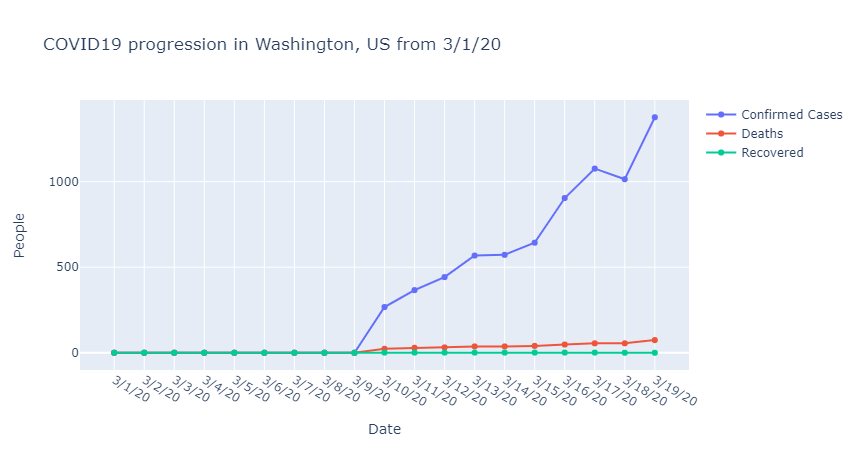

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'],y=df['Confirmed Cases'], mode='lines+markers', name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df['Date'],y=df['Deaths'], mode='lines+markers', name='Deaths'))
fig.add_trace(go.Scatter(x=df['Date'],y=df['Recovered'], mode='lines+markers', name='Recovered'))
fig.update_layout(
    title=f"COVID19 progression in {STATE}, {COUNTRY} from {START_DATE}",
    xaxis_title="Date",
    yaxis_title="People"
)
fig.show()

## Putting it all together

In [ ]:
#export 
def plot(state, country, start_date):
    global confirmed_df, deaths_df, recovered_df

    df = confirmed_df.loc[(confirmed_df['Province/State']==state) & (confirmed_df['Country/Region']==country),start_date:].T
    df.index.name = 'Date'
    df.reset_index(inplace=True)
    df.columns = ['Date', 'Confirmed Cases']

    ddf = deaths_df.loc[(deaths_df['Province/State']==state) & (deaths_df['Country/Region']==country),start_date:].T
    ddf.index.name = 'Date'
    ddf.reset_index(inplace=True)
    ddf.columns = ['Date', 'Deaths']
    
    rdf = recovered_df.loc[(recovered_df['Province/State']==state) & (recovered_df['Country/Region']==country),start_date:].T
    rdf.index.name = 'Date'
    rdf.reset_index(inplace=True)
    rdf.columns = ['Date', 'Recovered']

    df['Deaths']=ddf['Deaths']
    df['Recovered']=rdf['Recovered']

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'],y=df['Confirmed Cases'], mode='lines+markers', name='Confirmed Cases'))
    fig.add_trace(go.Scatter(x=df['Date'],y=df['Deaths'], mode='lines+markers', name='Deaths'))
    fig.add_trace(go.Scatter(x=df['Date'],y=df['Recovered'], mode='lines+markers', name='Recovered'))
    fig.update_layout(
        title=f"COVID19 progression in {state}, {country} from {start_date}",
        xaxis_title="Date",
        yaxis_title="People"
    )
    fig.show()


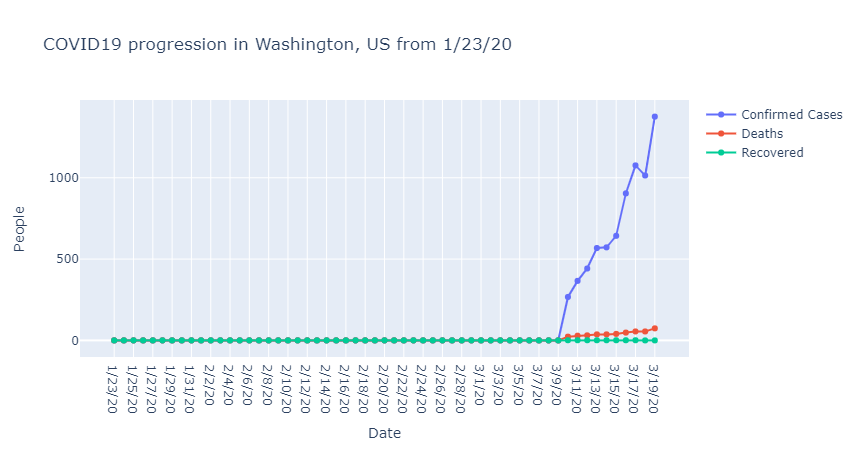

In [ ]:
plot('Washington', 'US', '1/23/20')

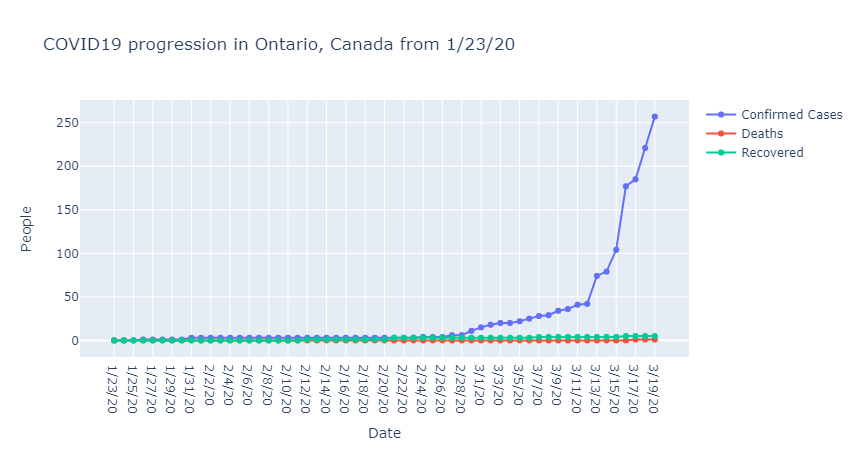

In [ ]:
plot('Ontario', 'Canada', '1/23/20')

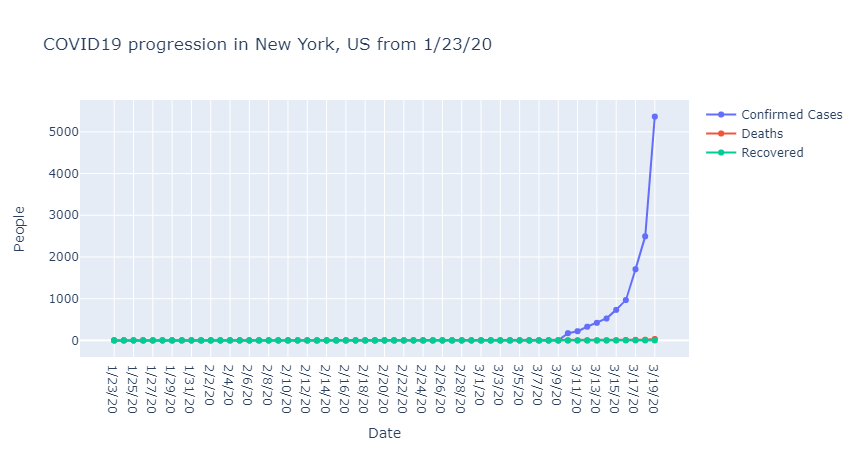

In [ ]:
plot('New York', 'US', '1/23/20')

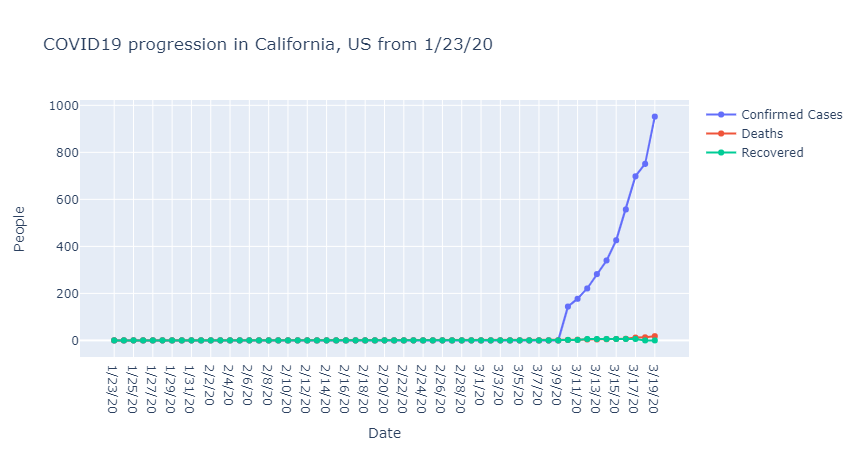

In [ ]:
plot('California', 'US', '1/23/20')

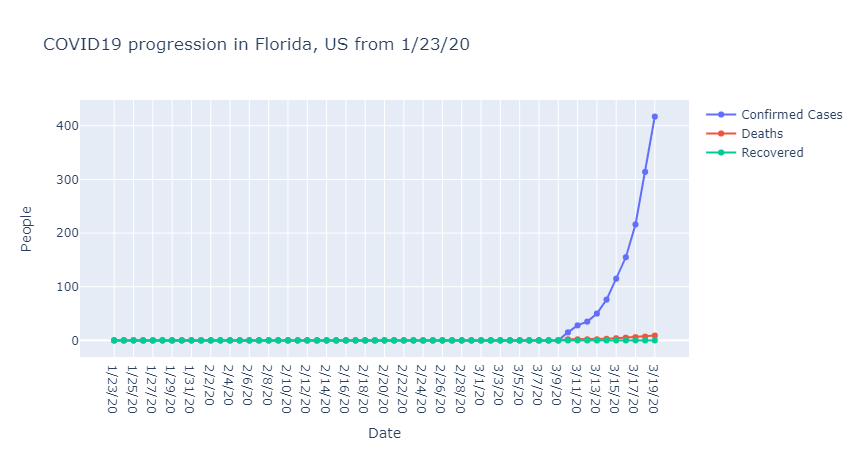

In [ ]:
plot('Florida', 'US', '1/23/20')

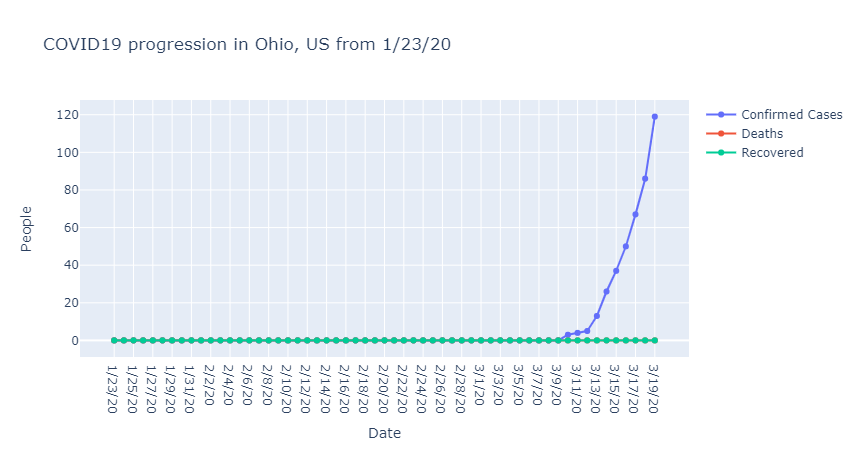

In [ ]:
plot('Ohio', 'US', '1/23/20')

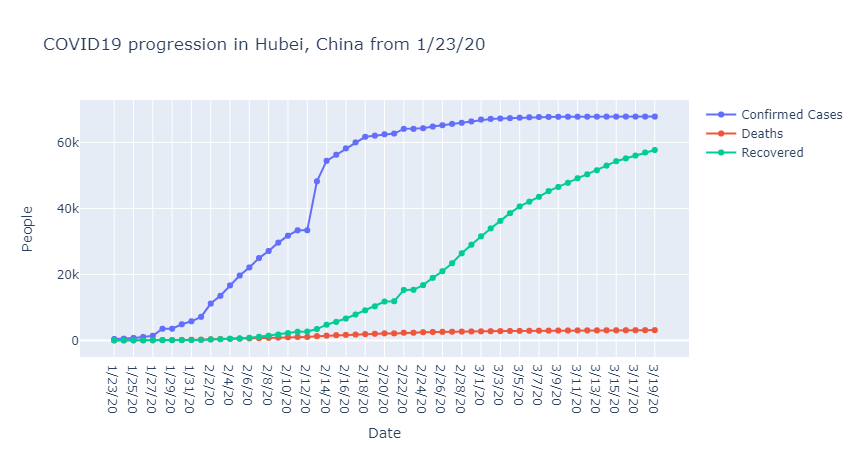

In [ ]:
plot('Hubei', 'China', '1/23/20')

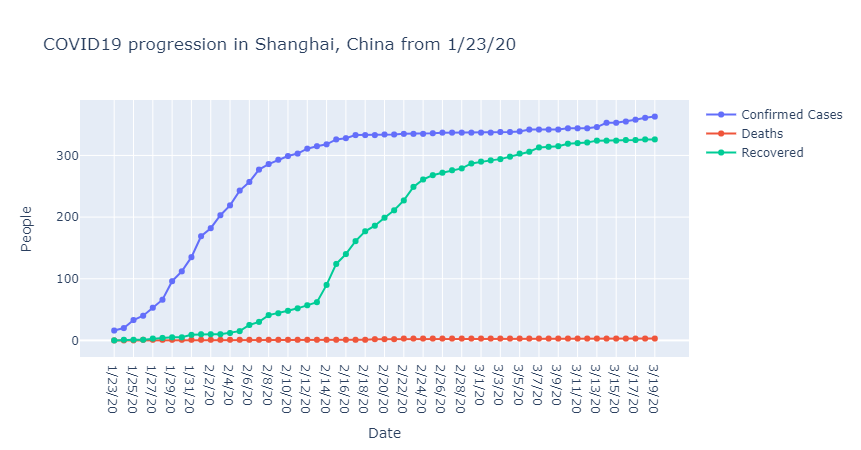

In [ ]:
plot('Shanghai', 'China', '1/23/20')

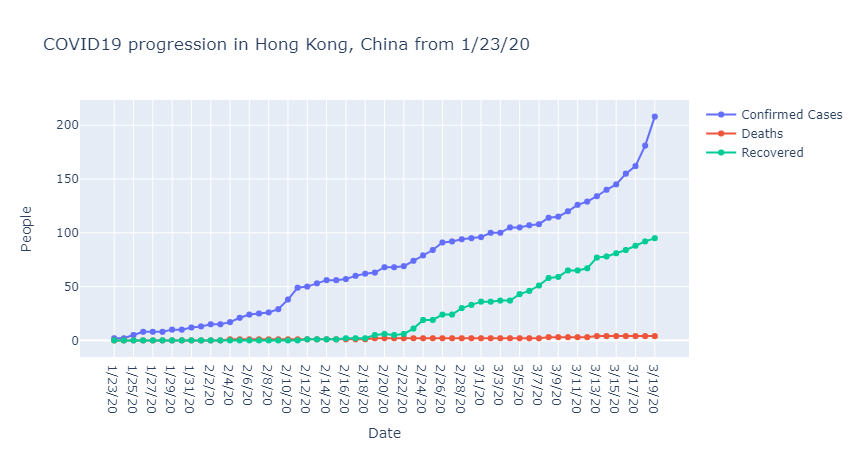

In [ ]:
plot('Hong Kong', 'China', '1/23/20')

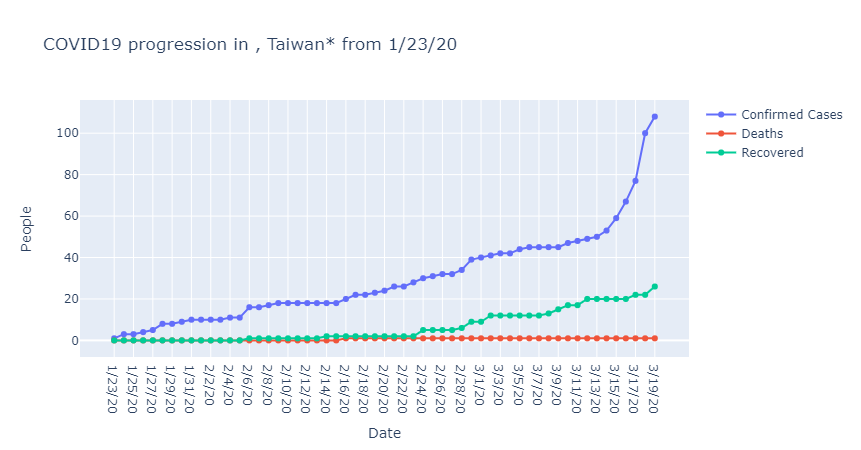

In [ ]:
plot('', 'Taiwan*', '1/23/20')

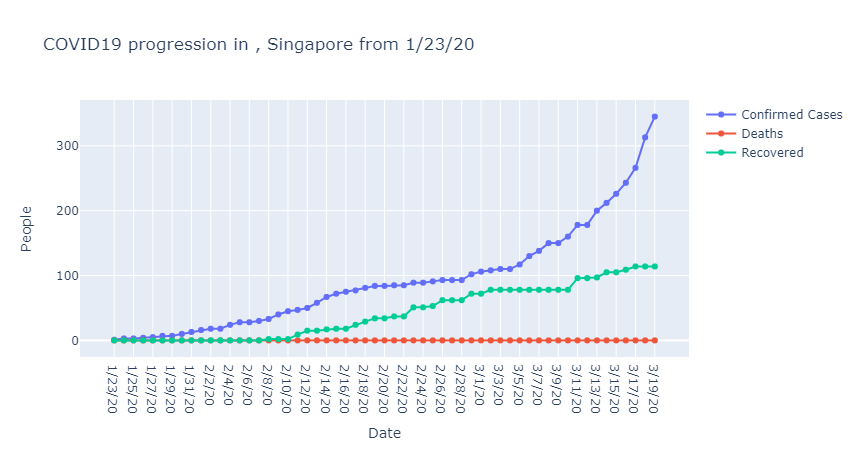

In [ ]:
plot('', 'Singapore', '1/23/20')

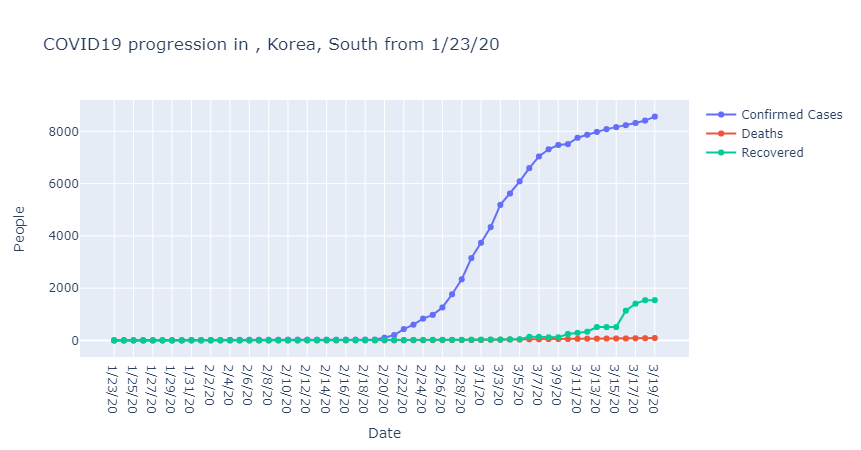

In [ ]:
plot('', 'Korea, South', '1/23/20')

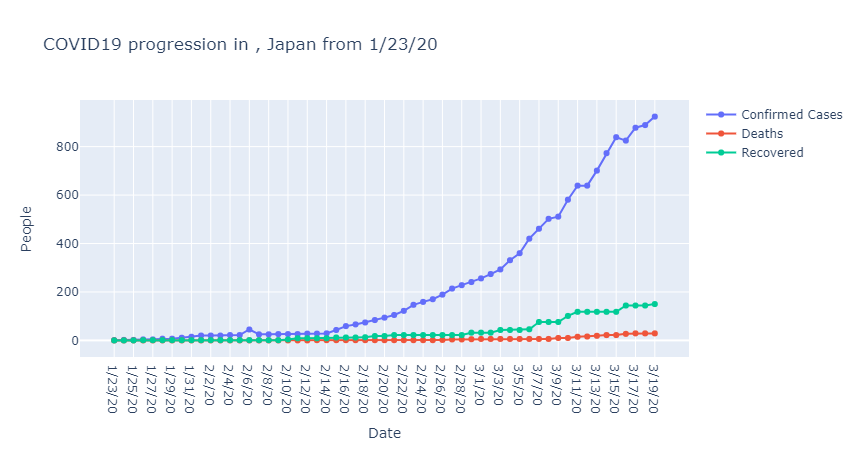

In [ ]:
plot('', 'Japan', '1/23/20')

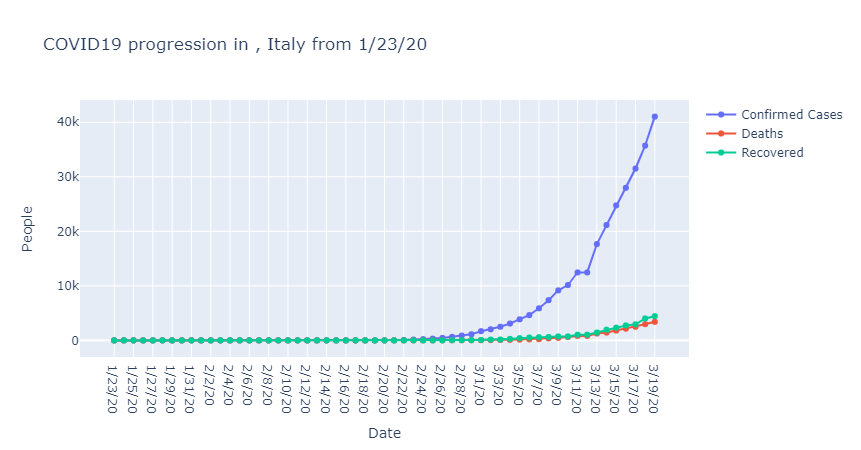

In [ ]:
plot('', 'Italy', '1/23/20')

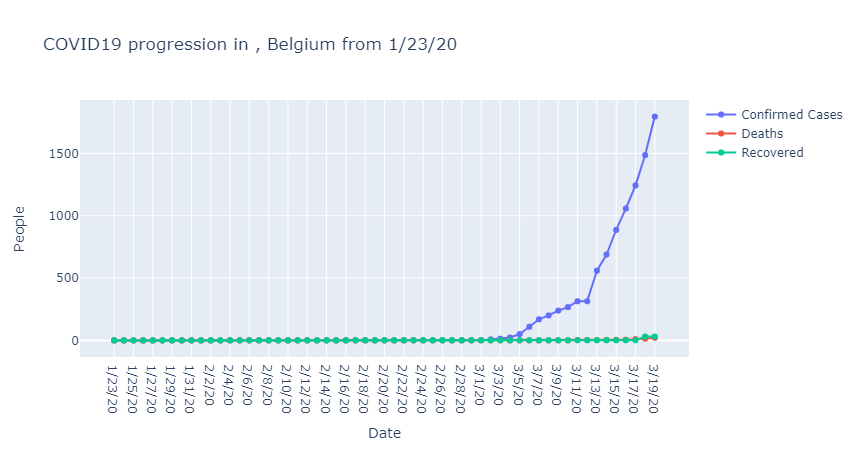

In [ ]:
plot('', 'Belgium', '1/23/20')

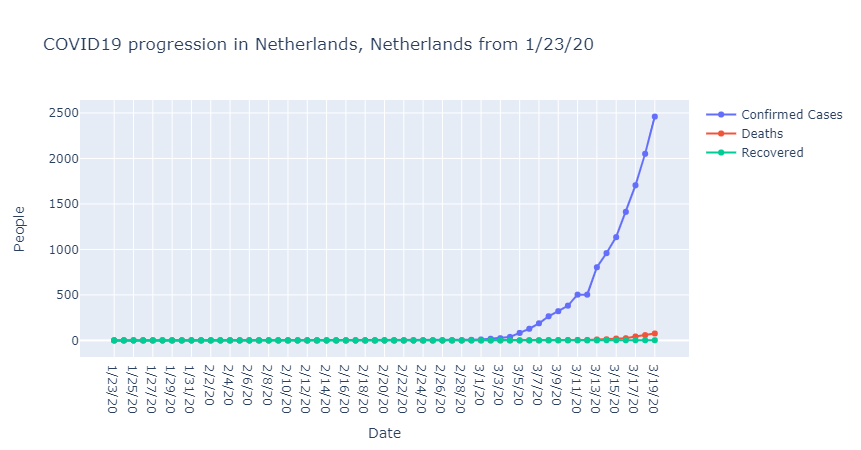

In [ ]:
plot('Netherlands', 'Netherlands', '1/23/20')

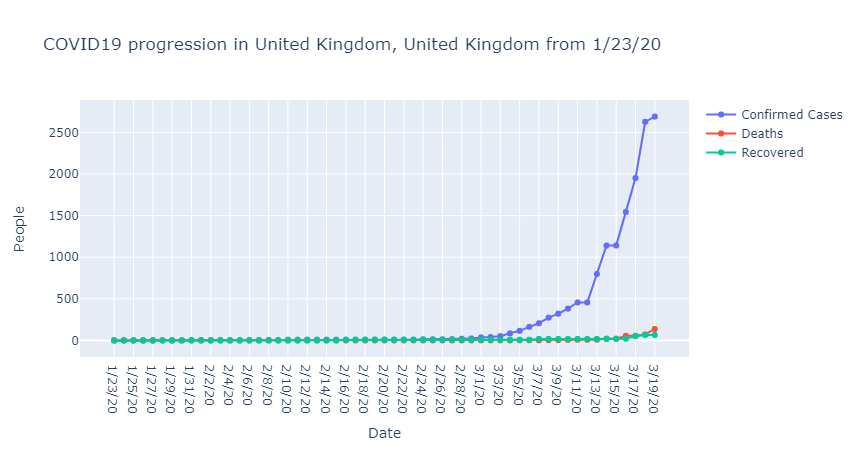

In [ ]:
plot('United Kingdom', 'United Kingdom', '1/23/20')

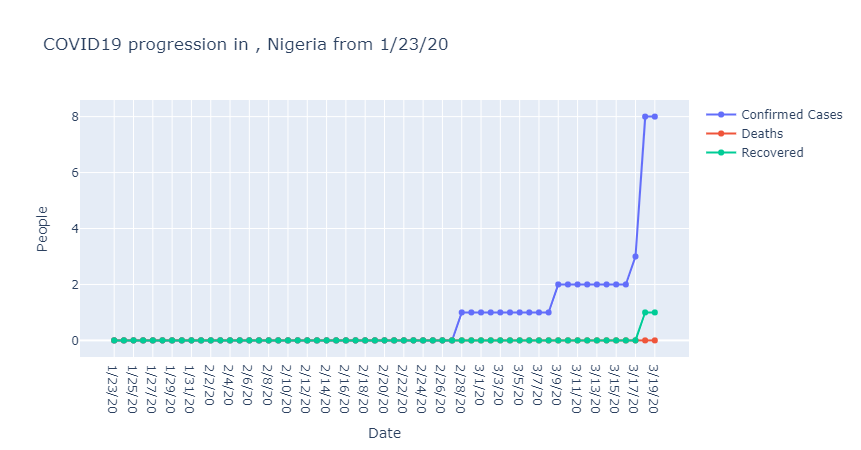

In [ ]:
plot('', 'Nigeria', '1/23/20')

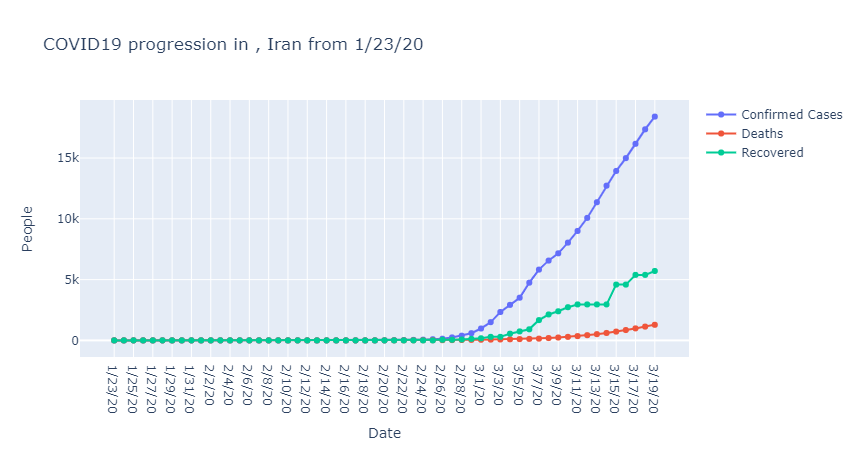

In [ ]:
plot('', 'Iran', '1/23/20')

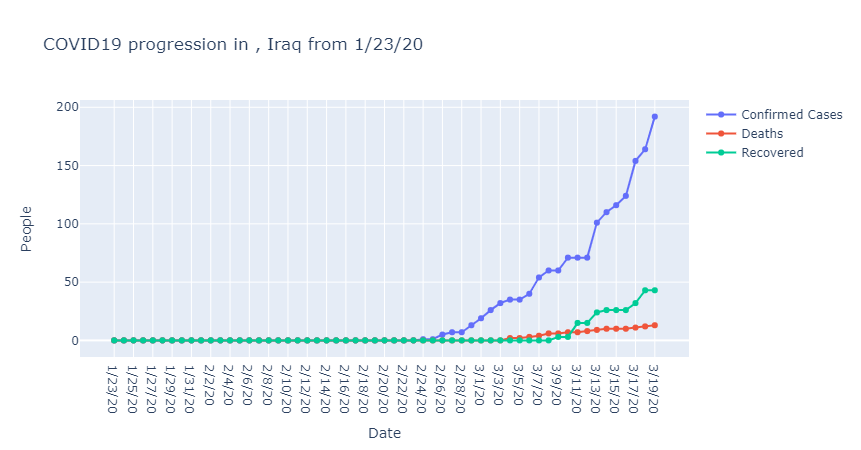

In [ ]:
plot('', 'Iraq', '1/23/20')